In [2]:
import pandas as pd
pd.set_option('display.width', 10000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from collections import Counter
import networkx as nx
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")


In [3]:
mwoz= pd.read_csv('../data/output/features.csv')
mwoz = mwoz.drop(columns=['Unnamed: 0', 'common_ratio'])

In [4]:
DOMAIN = 'Restaurant'

In [5]:
f'../data/output/most_frequent_transitions_{DOMAIN}.csv'


'../data/output/most_frequent_transitions_Restaurant.csv'

In [6]:
DOMAIN = 'Hotel'

In [19]:
intent_flows 


[{'conversation_id': 1,
  'intent_flow': ['Hotel-Inform',
   'Hotel-Request',
   'Hotel-Inform',
   'Hotel-NoOffer',
   'Hotel-Inform',
   'Hotel-Request',
   'Hotel-Request']},
 {'conversation_id': 2,
  'intent_flow': ['Hotel-Inform',
   'Hotel-NoOffer',
   'Hotel-Inform',
   'Hotel-NoOffer',
   'Hotel-Inform',
   'Hotel-Select',
   'Hotel-Request']},
 {'conversation_id': 4,
  'intent_flow': ['Hotel-Inform',
   'Hotel-Request',
   'Hotel-Inform',
   'Hotel-NoOffer',
   'Hotel-Inform']},
 {'conversation_id': 5,
  'intent_flow': ['Hotel-Inform',
   'Hotel-NoOffer',
   'Hotel-Inform',
   'Hotel-Request',
   'Hotel-Inform',
   'Hotel-Inform']},
 {'conversation_id': 7,
  'intent_flow': ['Hotel-Inform',
   'Hotel-NoOffer',
   'Hotel-Inform',
   'Hotel-Request',
   'Hotel-Inform',
   'Hotel-Inform']},
 {'conversation_id': 8, 'intent_flow': ['Hotel-Inform', 'Hotel-NoOffer']},
 {'conversation_id': 11,
  'intent_flow': ['Hotel-Inform',
   'Hotel-Inform',
   'Hotel-Inform',
   'Hotel-Inform',
  

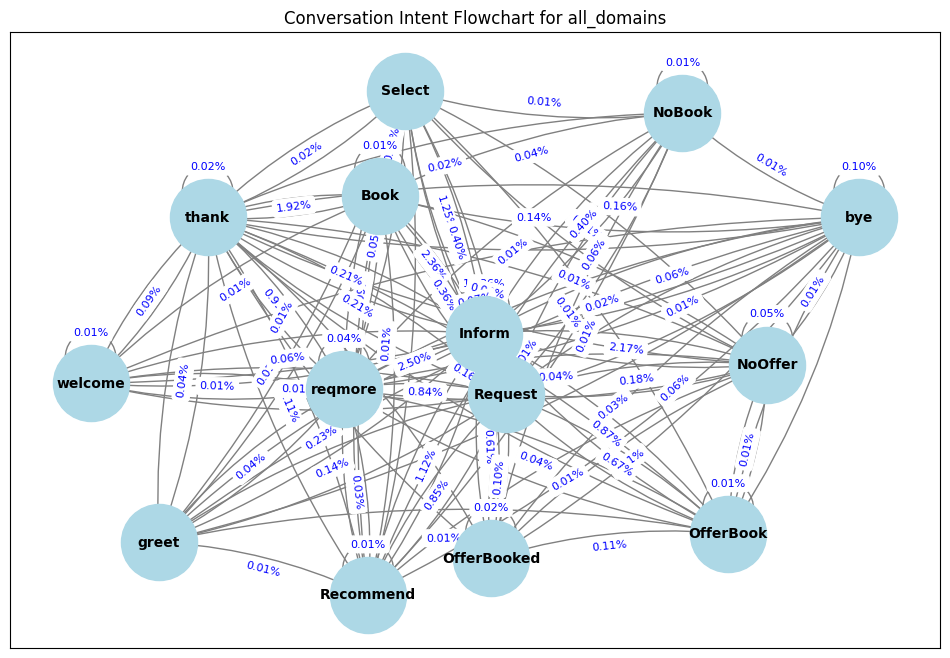

Most Frequent Transitions CSV: ../data/output/most_frequent_transitions_all_domains.csv


In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Filter data for the specified domain
DOMAIN = "all_domains"
# df = mwoz[mwoz['domain'] == DOMAIN]
df= mwoz.copy()

# Step 2: Group data by conversations
grouped = df.groupby("conv_ID")

# Step 3: Generate intent flows
intent_flows = []
for conv_id, group in grouped:
    intents = group['intent'].dropna().tolist()
    if intents:
        intent_flows.append({"conversation_id": conv_id, "intent_flow": intents})

# Convert flows to a DataFrame
flows_df = pd.DataFrame(intent_flows)

# Step 4: Create transitions
transitions = []
for flow in flows_df["intent_flow"]:
    for i in range(len(flow) - 1):
        transitions.append((flow[i], flow[i + 1]))

# Step 5: Count frequencies and normalize
transition_counts = Counter(transitions)
total_transitions = sum(transition_counts.values())
transition_frequencies = {k: v / total_transitions for k, v in transition_counts.items()}

# Step 6: Build the directed graph
G = nx.DiGraph()
for (start, end), freq in transition_frequencies.items():
    G.add_edge(start, end, weight=freq)

# Step 7: Generate positions for nodes
pos = nx.spring_layout(G, seed=42)

# Step 8: Visualize the graph
plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue")

# Draw edges with adjusted arrows
nx.draw_networkx_edges(
    G,
    pos,
    connectionstyle="arc3,rad=0.1",  # Curve the edges slightly to avoid overlap
    arrowstyle="->",
    arrowsize=25,  # Larger arrows
    edge_color="gray"
)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Add edge annotations for frequencies
edge_labels = {edge: f"{data['weight']:.2%}" for edge, data in G.edges.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5, font_color="blue")

# Add title
plt.title(f"Conversation Intent Flowchart for {DOMAIN}")

# Show the plot
plt.show()


transition_csv_path = f'../data/output/most_frequent_transitions_{DOMAIN}.csv'

# Save results to CSV
transition_df = pd.DataFrame([
    {"Transition": f"{k[0]} -> {k[1]}", "Frequency (%)": v * 100} for k, v in transition_frequencies.items()
])
transition_df.to_csv(transition_csv_path, index=False)

print(f"Most Frequent Transitions CSV: {transition_csv_path}")



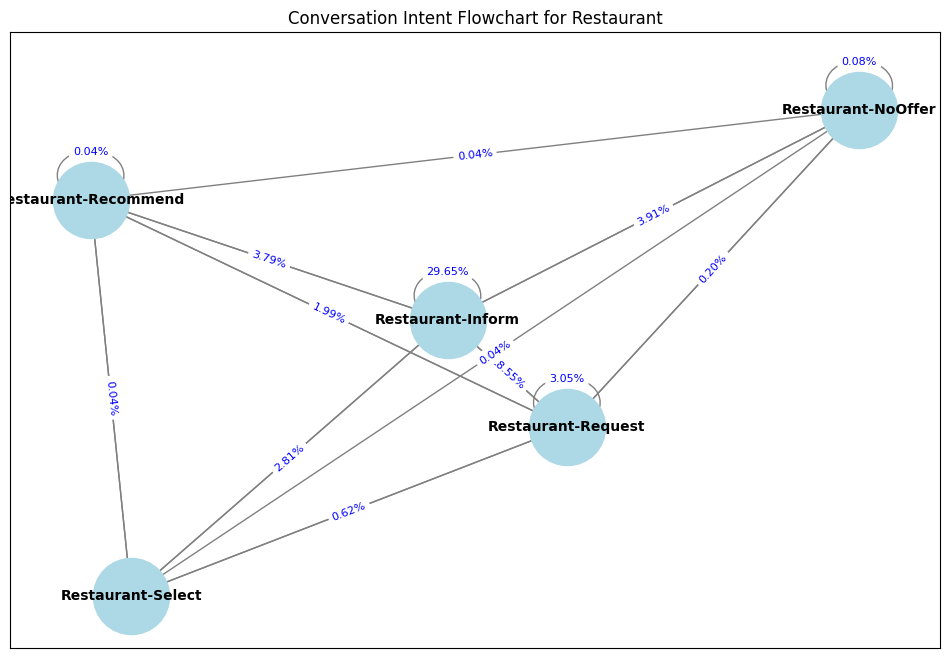

Most Frequent Transitions CSV: ../data/output/analysis/most_frequent_transitions_Restaurant.csv


In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Filter data for the specified domain
DOMAIN = 'Restaurant'
df = mwoz[mwoz['domain'] == DOMAIN]

# Step 2: Group data by conversations
grouped = df.groupby("conv_ID")

# Step 3: Generate intent flows
intent_flows = []
for conv_id, group in grouped:
    intents = group['domain-intent'].dropna().tolist()
    if intents:
        intent_flows.append({"conversation_id": conv_id, "intent_flow": intents})

# Convert flows to a DataFrame
flows_df = pd.DataFrame(intent_flows)

# Step 4: Create transitions
transitions = []
for flow in flows_df["intent_flow"]:
    for i in range(len(flow) - 1):
        transitions.append((flow[i], flow[i + 1]))

# Step 5: Count frequencies and normalize
transition_counts = Counter(transitions)
total_transitions = sum(transition_counts.values())
transition_frequencies = {k: v / total_transitions for k, v in transition_counts.items()}

# Step 6: Build the directed graph
G = nx.DiGraph()
for (start, end), freq in transition_frequencies.items():
    G.add_edge(start, end, weight=freq)

# Step 7: Generate positions for nodes
pos = nx.spring_layout(G, seed=42)

# Step 8: Visualize the graph
plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue")

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="gray")

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Add edge annotations for frequencies
edge_labels = {edge: f"{data['weight']:.2%}" for edge, data in G.edges.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5, font_color="blue")

# Add title
plt.title(f"Conversation Intent Flowchart for {DOMAIN}")

# Show the plot
plt.show()

# Output file paths
transition_csv_path = f'../data/output/analysis/most_frequent_transitions_{DOMAIN}.csv'


# Save results to CSV
transition_df = pd.DataFrame([
    {"Transition": f"{k[0]} -> {k[1]}", "Frequency (%)": v * 100} for k, v in transition_frequencies.items()
])
transition_df.to_csv(transition_csv_path, index=False)

print(f"Most Frequent Transitions CSV: {transition_csv_path}")


In [8]:
# Ensure 'domain' and 'domain-intent' columns are valid (drop NaNs)
df = mwoz.copy()
df = df.dropna(subset=['domain', 'intent'])

# Step 1: Sort and align indices for transitions
df = df.sort_values(['conv_ID', 'turn_id']).reset_index(drop=True)

# Step 2: Create the 'next_intent' column
df['next_intent'] = df['intent'].shift(-1)
# Step 3: Drop rows where 'next_intent' is NaN (last turn in a conversation)
df = df.dropna(subset=['next_intent']).reset_index(drop=True)
df[['conv_ID', 'turn_id','domain-intent', 'domain', 'intent', 'next_intent']].head(10)


# Step 4: Create the 'transition' column
df['intent_transition'] = list(zip(df['intent'], df['next_intent']))


df[['conv_ID', 'turn_id','domain-intent', 'domain', 'intent', 'next_intent', 'intent_transition']].head(10)

# Fill 'transition' for END with null
df.loc[df.groupby('conv_ID')['turn_id'].idxmax(), 'intent_transition'] = np.nan


df[['conv_ID', 'turn_id','domain-intent', 'domain', 'intent', 'next_intent', 'intent_transition']].head(10)

# Step 5: Group by domain and transition, count occurrences
transition_stats = (
    df.groupby(['domain', 'intent_transition'])
    .size()
    .reset_index(name='Count')
    .sort_values(['domain', 'Count'], ascending=[True, False])
)

# Calculate the within-domain frequency
domain_totals = transition_stats.groupby('domain')['Count'].transform('sum')
transition_stats['frequency_within_domain'] = (
    transition_stats['Count'] / domain_totals).round(2)

transition_stats

transition_stats[['intent_from', 'intent_to']] = (
    transition_stats['intent_transition'].astype(str)
    .str.strip("()")  # Remove parentheses
    .str.replace("'", "")  # Remove single quotes
    .str.split(", ", expand=True)  # Split into two parts
)

transition_stats



,domain,intent_transition,Count,frequency_within_domain,intent_from,intent_to
1,Attraction,"(Inform, Inform)",748,0.41,Inform,Inform
20,Attraction,"(Request, Inform)",313,0.17,Request,Inform
5,Attraction,"(Inform, Request)",298,0.16,Inform,Request
10,Attraction,"(Inform, thank)",91,0.05,Inform,thank
3,Attraction,"(Inform, NoOffer)",65,0.04,Inform,NoOffer
...,...,...,...,...,...,...
246,general,"(reqmore, NoOffer)",1,0.00,reqmore,NoOffer
252,general,"(reqmore, greet)",1,0.00,reqmore,greet
261,general,"(thank, Recommend)",1,0.00,thank,Recommend
263,general,"(thank, Select)",1,0.00,thank,Select


In [10]:
import pandas as pd
import plotly.express as px


data = {
    'intent_from': transition_stats['intent_from'],
    'intent_to': transition_stats['intent_to'],
    'frequency': transition_stats['frequency_within_domain']  # Transition frequencies
}
df = pd.DataFrame(data)

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='intent_from', columns='intent_to', values='frequency', fill_value=0).round(3)

# Create a heatmap
fig = px.imshow(
    heatmap_data,
    text_auto=True,  # Display values on the heatmap
    color_continuous_scale="blues",
    title="Transition Heatmap: Intent States",
    labels=dict(x="Intent To", y="Intent From", color="Frequency")
)

# Update trace to increase text size
fig.update_traces(
    textfont=dict(size=12)   # Increase the font size
)

# Update layout
fig.update_layout(
    xaxis_title="Intent To",
    yaxis_title="Intent From",
    font=dict(size=10)
)

fig.show()
fig.write_html("intent_transitions_heatmap.html")


In [11]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

data = {
    'intent_from': transition_stats['intent_from'],
    'intent_to': transition_stats['intent_to'],
    'frequency': transition_stats['frequency_within_domain']  # Transition frequencies
}
df = pd.DataFrame(data)

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges with weights (frequencies)
for _, row in df.iterrows():
    G.add_edge(row['intent_from'], row['intent_to'], weight=row['frequency'])

# Calculate node frequencies (in-degree + out-degree frequencies)
node_frequencies = {node: 0 for node in G.nodes()}
for _, row in df.iterrows():
    node_frequencies[row['intent_from']] += row['frequency']
    node_frequencies[row['intent_to']] += row['frequency']

# Create positions for nodes
pos = nx.spring_layout(G, seed=42)

# Extract edges and weights
edges = list(G.edges(data=True))
edge_x = []
edge_y = []
arrow_x = []
arrow_y = []

for edge in edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]

    # Add lines for edges
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

    # Calculate arrowhead position closer to the target node
    arrow_x.append(x1 - 0.1 * (x1 - x0))  # Move 10% back along the line
    arrow_y.append(y1 - 0.1 * (y1 - y0))  # Move 10% back along the line

# Create edge traces
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)


arrow_trace = go.Scatter(
    x=arrow_x, y=arrow_y,
    mode='markers',
    marker=dict(size=10, color='#888', symbol='arrow-bar-up', angleref="previous"),
    hoverinfo='none'
)

# Create node traces with dynamic sizes based on frequency
node_x = []
node_y = []
node_labels = []
node_sizes = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_labels.append(node)
    node_sizes.append(node_frequencies[node])  # Set size based on frequency

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    marker=dict(
        size=[size * 2 for size in node_sizes],  # Scale sizes for better visualization
        color='#1f77b4'
    ),
    text=node_labels,
    textposition="top center"
)

# Add to figure
fig = go.Figure(data=[edge_trace, arrow_trace, node_trace])
fig.update_layout(
    title="Intent Transition Network with Node Sizes by Frequency",
    showlegend=False
)

fig.show()
fig.write_html("intent_transitions_graph.html")


In [12]:
from importlib.metadata import version
version('plotly')

'5.24.1'

In [17]:
#VIZ Sankey super unclear
# import pandas as pd
import plotly.graph_objects as go

# Example DataFrame (replace with your actual DataFrame)
data = {
    'intent_from': transition_stats['intent_from'],
    'intent_to': transition_stats['intent_to'],
    'frequency': transition_stats['frequency_within_domain']  # Transition frequencies
}
df = pd.DataFrame(data)

# Create a list of unique states (nodes)
all_states = pd.concat([df['intent_from'], df['intent_to']]).unique()
state_to_index = {state: idx for idx, state in enumerate(all_states)}

# Map states to indices
df['source'] = df['intent_from'].map(state_to_index)
df['target'] = df['intent_to'].map(state_to_index)

# Create the Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(all_states)  # Labels for the nodes
    ),
    link=dict(
        source=df['source'],  # Indices of source states
        target=df['target'],  # Indices of target states
        value=df['frequency']  # Frequency of transitions
    )
)])

# Update layout
fig.update_layout(
    title_text="Intent Transition States",
    font_size=12
)

# Show the chart
fig.show()
fig.write_html("intent_transitions.html")



In [15]:
df['intent_from'].unique() ,
df['intent_to'].unique() 

array(['Inform', 'Request', 'thank', 'NoOffer', 'Recommend', 'reqmore',
       'bye', 'Select', 'NoBook', 'greet', 'Book', 'welcome',
       'OfferBooked', 'OfferBook'], dtype=object)